# <b>Task:</b> Implementation of genetic algorithms for different problems (knapsack problem, travelling salesman problem)

Benchmarks for the backpack used are from the website:  https://tsplib95.readthedocs.io/en/stable/pages/usage.html (P01-P07)

The TSP used as the TSP is the data from the website:  https://docs.yandex.ru/docs/view?tm=1652864571&tld=ru&lang=en&name=tsp95.pdf&text=LOWER%20DIAG%20ROW%20%D1%82%D0%B8%D0%BF%20%D1%87%D1%82%D0%BE%20%D0%B7%D0%BD%D0%B0%D1%87%D0%B8%D1%82&url=http%3A%2F%2Fcomopt.ifi.uni-heidelberg.de%2Fsoftware%2FTSPLIB95%2Ftsp95.pdf&lr=20037&mime=pdf&l10n=ru&sign=d927f06c318de460ad62e1fec476863d&keyno=0&nosw=1&serpParams=tm%3D1652864571%26tld%3Dru%26lang%3Den%26name%3Dtsp95.pdf%26text%3DLOWER%2BDIAG%2BROW%2B%25D1%2582%25D0%25B8%25D0%25BF%2B%25D1%2587%25D1%2582%25D0%25BE%2B%25D0%25B7%25D0%25BD%25D0%25B0%25D1%2587%25D0%25B8%25D1%2582%26url%3Dhttp%253A%2F%2Fcomopt.ifi.uni-heidelberg.de%2Fsoftware%2FTSPLIB95%2Ftsp95.pdf%26lr%3D20037%26mime%3Dpdf%26l10n%3Dru%26sign%3Dd927f06c318de460ad62e1fec476863d%26keyno%3D0%26nosw%3D1  (a280, att48, bays29, fl417, ch150, gr17)

## data reading + support functions

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## knapsack problem

In [ ]:
!unzip '/content/drive/MyDrive/knapsack_final.zip'

Archive:  /content/drive/MyDrive/knapsack_final.zip
   creating: data_test/
   creating: data_test/P01/
  inflating: data_test/P01/p01_c.txt  
  inflating: data_test/P01/p01_p.txt  
  inflating: data_test/P01/p01_s.txt  
  inflating: data_test/P01/p01_w.txt  
   creating: data_test/P02/
  inflating: data_test/P02/p02_c.txt  
  inflating: data_test/P02/p02_p.txt  
  inflating: data_test/P02/p02_s.txt  
  inflating: data_test/P02/p02_w.txt  
   creating: data_test/P03/
  inflating: data_test/P03/p03_c.txt  
  inflating: data_test/P03/p03_p.txt  
  inflating: data_test/P03/p03_s.txt  
  inflating: data_test/P03/p03_w.txt  
   creating: data_test/P04/
  inflating: data_test/P04/p04_c.txt  
  inflating: data_test/P04/p04_p.txt  
  inflating: data_test/P04/p04_s.txt  
  inflating: data_test/P04/p04_w.txt  
   creating: data_test/P05/
  inflating: data_test/P05/p05_c.txt  
  inflating: data_test/P05/p05_p.txt  
  inflating: data_test/P05/p05_s.txt  
  inflating: data_test/P05/p05_w.txt  
   c

In [ ]:
import os
def get_data_for_test_knap(path_folder):
  weight = []
  cost = []
  answer = []
  max_weight = 0
  for filename in os.listdir(path_folder):
    data_ = []
    with open(os.path.join(path_folder, filename), 'r') as f:
      for line in f:
        data_.append(int(line))
    if filename[-5] == 'c':
      max_weight = data_
    elif filename[-5] == 'p':
      cost = data_
    elif filename[-5] == 'w':
      weight = data_
    elif filename[-5] == 's':
      answer = data_
  print_data_for_test(max_weight, weight, cost, answer)
  return max_weight, weight , cost, answer

In [ ]:
def get_final_cost_weight(weight,cost, answer_indexes):
  cost_f = 0
  weight_f = 0
  for i in range(len(answer_indexes)):
    if answer_indexes[i] == 1:
      cost_f += cost[i]
      weight_f += weight[i]
  return cost_f, weight_f

In [ ]:
def print_data_for_test(max_weight, weight, cost, answer):
  print("ДАННЫЕ: ")
  print("Объем рюкзака                 ", max_weight)
  print("Веса объектов                 ", weight)
  print("Ценность объектов             ", cost)
  print("Оптимальное решение           ", answer)

In [ ]:
import matplotlib.pyplot as plt


def printItems(items):
    for item in items:
        print("Weight = " + str(item.weight_) + " | Cost = " + str(item.cost_) + " | State = " + str(item.state_))


def printGraphAnswerToOpt(optimum, data):
    plt.title('Timed answer to optimum')
    optimum_array = [optimum for _ in range(len(data))]
    #time = [i for i in range(len(data))]
    plt.plot(optimum_array)
    plt.plot(data)
    plt.show()


def printTimeGraph(x, y):
    plt.title('Average Time')
    plt.plot(x, y)
    #plt.xscale('log', base=10)
    plt.show()


def printAverageAnswerClear(x, y):
    plt.title('Average Answer')
    plt.plot(x, y)
    #plt.xscale('log', base=10)
    plt.show()


In [ ]:
class Gene:
    def __init__(self, weight, cost, state):
        self.weight_ = weight
        self.cost_ = cost
        self.state_ = state
        self.coefficient_ = cost/weight

    def getWeight(self):
        return self.weight_

    def getCost(self):
        return self.cost_

    def getState(self):
        return self.state_

    def getCoefficient(self):
        return self.coefficient_



In [ ]:
import random as rn


class Chromosome:
    def __init__(self, genes=None):
        if genes is None:
            genes = []
        self.genes_ = genes

    def calculateSuitability(self):
        suitability = 0
        for gene in self.genes_:
            if gene.state_:
                suitability += gene.cost_
        return suitability

    def calculateSumWeight(self):
        weight = 0
        for gene in self.genes_:
            if gene.state_:
                weight += gene.weight_
        return weight

    def shuffleGene(self, condition):
        addedGenes = 0
        while self.calculateSumWeight() <= condition and addedGenes != len(self.genes_):
            geneId = rn.randint(0, len(self.genes_) - 1)
            self.genes_[geneId].state_ = 1
            if self.calculateSumWeight() > condition:
                self.genes_[geneId].state_ = 0
                break
            addedGenes += 1
        return self

    def getGenes(self):
        return self.genes_

    def addGene(self, item):
        self.genes_.append(item)


In [ ]:
class Entity:
    def __init__(self, chromosome):
        self.chromosome_ = chromosome
        self.suitability_ = self.chromosome_.calculateSuitability()
        self.sumWeight_ = self.chromosome_.calculateSumWeight()

    def getChromosome(self):
        return self.chromosome_

    def getSuitability(self):
        return self.suitability_

    def getSumWeight(self):
        return self.sumWeight_


In [ ]:
class Population:
    def __init__(self, condition=0, population=None):
        if population is None:
            population = []
        self.population_ = population
        self.condition_ = condition

    def addEntity(self, entity):
        self.population_.append(entity)

    def getPopulation(self):
        return self.population_

    def checkAnswer(self):
        for i in range(1, len(self.population_)):
            if self.population_[i].getSumWeight() == \
                    self.population_[i - 1].getSumWeight() and \
                    self.population_[i].getSumWeight() == \
                    self.population_[i - 1].getSuitability():
                continue
            else:
                return False
        return True

    def printPopulation(self):
        for i in range(len(self.population_)):
            print('\n')
            print("Entity = " + str(i) + " | SumWeight = " + str(
                self.population_[i].getSumWeight()) + " | Suitability = " + str(
                self.population_[i].getSuitability()))
            print("----------------------------------------------")
            items = self.population_[i].gene_.itemsChair_
            printItems(items)

    def printOneEntity(self, i):
        print("Entity = " + str(i) + " | SumWeight = " + str(
            self.population_[i].getSumWeight()) + " | Suitability = " + str(
            self.population_[i].getSuitability()))
        print("----------------------------------------------")
        items = self.population_[i].gene_.genes_
        printItems(items)

    def checkCondition(self, sumWeight):
        if sumWeight > self.condition_:
            return False
        else:
            return True

    def getCondition(self):
        return self.condition_

    def getResult(self):
        return "Max Suitability = " + str(self.getMaxSuitability()[0])

    def getMaxSuitability(self):
        maxSuitability = 0
        for entity in self.population_:
            if entity.getSuitability() > maxSuitability:
                maxSuitability = entity.getSuitability()
                answer_entity = entity
        return maxSuitability, answer_entity

    def getAverageSuitability(self):
        sumSuitability = 0
        numberEntity = len(self.population_)
        for entity in self.population_:
            sumSuitability += entity.getSuitability()
        return sumSuitability / numberEntity

    def copy(self):
        newPopulation = Population(self.condition_)
        for entity in self.population_:
            newPopulation.addEntity(entity)
        return newPopulation


In [ ]:
import random as rn


def mutation(chromosome, condition):
    prob = rn.randint(0, 1000)
    if prob < 10:
        while True:
            gene = chromosome.getGenes()[rn.randint(0, len(chromosome.getGenes()) - 1)]
            if gene.state_ == 0:
                gene.state_ = 1
                if chromosome.calculateSumWeight() < condition:
                    break
                else:
                    gene.state_ = 0
            else:
                gene.state_ = 0
                if chromosome.calculateSumWeight() < condition:
                    break


def crossover(entityPair, condition):
    geneLength = len(entityPair[0].getChromosome().getGenes())
    breakPoint = rn.randint(1, geneLength-2)
    genes = []
    newChromosome = Chromosome(genes)
    for i in range(breakPoint):
        newGene = Gene(entityPair[0].getChromosome().getGenes()[i].getWeight(),
                       entityPair[0].getChromosome().getGenes()[i].getCost(),
                       entityPair[0].getChromosome().getGenes()[i].getState())

        newChromosome.addGene(newGene)

    for j in range(breakPoint, geneLength):
        newGene = Gene(entityPair[1].getChromosome().getGenes()[j].getWeight(),
                       entityPair[1].getChromosome().getGenes()[j].getCost(),
                       entityPair[1].getChromosome().getGenes()[j].getState())

        newChromosome.addGene(newGene)

    sumWeight = newChromosome.calculateSumWeight()
    i = 0
    while condition < sumWeight and i < len(genes):
        if newChromosome.genes_[i].state_ == 1:
            newChromosome.genes_[i].state_ = 0
            sumWeight -= newChromosome.genes_[i].getWeight()
        i += 1

    mutation(newChromosome, condition)
    return newChromosome


In [ ]:
def generateFirstGeneration(items_data, entities_number, condition):
    population = Population(condition)
    i = 0
    while i < entities_number:
        newGenes = []
        for item in items_data:
            newGene = Gene(item.weight_, item.cost_, item.state_)
            newGenes.append(newGene)
        chromosome = Chromosome(newGenes).shuffleGene(condition)
        entity = Entity(chromosome)
        population.addEntity(entity)
        i += 1
    return population


In [ ]:
import random as rn


def selection(population, best=True, random=False):
    populationCopy = population.copy()
    func = rn.randint(0, 2)
    if func == 0:
        search = binaryTournamentSelection
    elif func == 1:
        search = proportionalSelection
    else:
        search = sliceTournamentSelection

    if random:
        search = proportionalSelection

    firstEntity = search(populationCopy, best)
    populationCopy.getPopulation().remove(firstEntity)
    secondEntity = search(populationCopy, best)
    return [firstEntity, secondEntity]


def binaryTournamentSelection(population, best=True):
    choice = -1
    if not best:
        choice = 0

    entityNumber = len(population.getPopulation())
    firstEntity = rn.randint(0, entityNumber - 1)
    secondEntity = rn.randint(0, entityNumber - 1)
    while firstEntity == secondEntity:
        secondEntity = rn.randint(0, entityNumber - 1)
    pair = [population.getPopulation()[firstEntity], population.getPopulation()[secondEntity]]
    return sorted(pair, key=lambda x: x.getSuitability())[choice]


def sliceTournamentSelection(population_, best=True):
    choice = -1
    if not best:
        choice = 0

    population = population_.getPopulation()
    if len(population) == 1:
        return population[0]

    startOffset = 0
    endOffset = 1
    if len(population) >= 3:
        startOffset = rn.randint(0, int(len(population) / 2 - 1))
        endOffset = rn.randint(startOffset + 1, len(population) - 1)

    best_entity = sorted(population[startOffset: endOffset], key=lambda x: x.getSuitability())[choice]
    return best_entity


def proportionalSelection(population, best=True):
    wheelOfFortune = []
    population_array = population.getPopulation()
    if len(population_array) == 1:
        return population_array[0]
    else:
        wheelOfFortune.append(population_array[0].getSuitability())

    for i in range(1, len(population_array)):
        wheelOfFortune.append(population_array[i].getSuitability() + wheelOfFortune[i-1])

    randomSuitability = rn.randint(0, wheelOfFortune[-1])
    i = 0
    while randomSuitability > wheelOfFortune[i]:
        i += 1
    return population_array[i]


In [ ]:
import random


def generationChange(population, statistic):
    newPopulation = Population(population.getCondition())
    entityNumber = len(population.getPopulation())
    oldEntityNumber = int(entityNumber * 0.1)
    i = 0
    populationCopy = population.copy()
    # Best entity
    while i < int((entityNumber - oldEntityNumber) * 0.7):
        pair = selection(populationCopy, True)
        newGene = crossover(pair, population.getCondition())
        newEntity = Entity(newGene)
        newPopulation.addEntity(newEntity)
        entityForRemove = random.randint(0, 1)
        populationCopy.getPopulation().remove(pair[entityForRemove])
        i += 1

    # The worst
    while i < int((entityNumber - oldEntityNumber) * 0.8):
        pair = selection(populationCopy, False)
        newGene = crossover(pair, population.getCondition())
        newEntity = Entity(newGene)
        newPopulation.addEntity(newEntity)
        entityForRemove = random.randint(0, 1)
        populationCopy.getPopulation().remove(pair[entityForRemove])
        i += 1

    # Random
    while i < int((entityNumber - oldEntityNumber) * 0.9):
        pair = selection(populationCopy, False, True)
        newGene = crossover(pair, population.getCondition())
        newEntity = Entity(newGene)
        newPopulation.addEntity(newEntity)
        entityForRemove = random.randint(0, 1)
        populationCopy.getPopulation().remove(pair[entityForRemove])
        i += 1

    # Best oldies
    while i < entityNumber:
        oldEntity = binaryTournamentSelection(population)
        newPopulation.addEntity(oldEntity)
        population.population_.remove(oldEntity)
        i += 1

    #statistic.append(newPopulation.getMaxSuitability())
    #statistic.append(newPopulation.getAverageSuitability())
    return newPopulation


In [ ]:
class Backpack:
  def __init__(self, max_weight, answer, cost_a, weight_a):
    self.condition = max_weight[0]
    self.answer = get_final_cost_weight(weight_a, cost_a, answer)[0]
    self.items = []
    for i in range(len(cost_a)):
      self.items.append(Gene(weight_a[i], cost_a[i], 0))

In [ ]:
def getBackpacks():
  backpacks = []
  path = "data_test/P0"
  for i in range(1, 8):
      max_weight, weight , cost, answer = get_data_for_test_knap(path + str(i) + "/")
      backpacks.append(Backpack(max_weight, answer, cost, weight))
  return backpacks

ДАННЫЕ: 
Объем рюкзака                  [165]
Веса объектов                  [23, 31, 29, 44, 53, 38, 63, 85, 89, 82]
Ценность объектов              [92, 57, 49, 68, 60, 43, 67, 84, 87, 72]
Оптимальное решение            [1, 1, 1, 1, 0, 1, 0, 0, 0, 0]
ДАННЫЕ: 
Объем рюкзака                  [26]
Веса объектов                  [12, 7, 11, 8, 9]
Ценность объектов              [24, 13, 23, 15, 16]
Оптимальное решение            [0, 1, 1, 1, 0]
ДАННЫЕ: 
Объем рюкзака                  [190]
Веса объектов                  [56, 59, 80, 64, 75, 17]
Ценность объектов              [50, 50, 64, 46, 50, 5]
Оптимальное решение            [1, 1, 0, 0, 1, 0]
ДАННЫЕ: 
Объем рюкзака                  [50]
Веса объектов                  [31, 10, 20, 19, 4, 3, 6]
Ценность объектов              [70, 20, 39, 37, 7, 5, 10]
Оптимальное решение            [1, 0, 0, 1, 0, 0, 0]
ДАННЫЕ: 
Объем рюкзака                  [104]
Веса объектов                  [25, 35, 45, 5, 25, 3, 2, 2]
Ценность объектов            

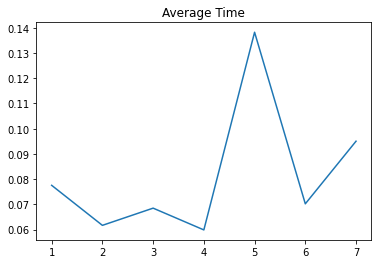

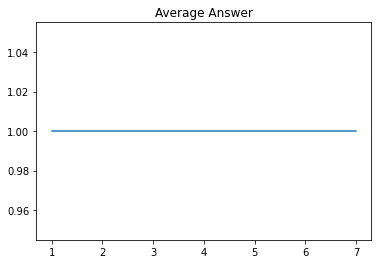

In [ ]:
import random as rn
import time


backpacks = getBackpacks()
entity_num = 100
Tm = 10
condition_array_x = []
condition_array_y = []
time_array_x = []
time_array_y = []


for backpack in backpacks:
      for i in range(100):
        start = time.time()
        data = sorted(backpack.items[:], key=lambda x: x.getCoefficient())
        print("Answer = " + str(backpack.answer))
        print("Condition = " + str(backpack.condition))
        population = generateFirstGeneration(data, entity_num, backpack.condition)
        statistic = []
        for generationNumber in range(Tm):
            population = generationChange(population, statistic)
        time_array_y.append(time.time() - start)
        print("\n--------------------------------------\n" + population.getResult() + "\n--------------------------------------\n")
        optimum = backpack.answer
        answer, entity = population.getMaxSuitability()
        if i == 0:
          printItems(entity.getChromosome().getGenes())
        #printGraphAnswerToOpt(answer, statistic)
      time_array_x.append(i)
      condition_array_x.append(i)
      condition_array_y.append(answer/optimum)


print(time_array_y)
print(condition_array_y)
printTimeGraph(time_array_x, time_array_y)
printAverageAnswerClear(condition_array_x, condition_array_y)


Slower in time, but with convergence dynamics

ДАННЫЕ: 
Объем рюкзака                  [165]
Веса объектов                  [23, 31, 29, 44, 53, 38, 63, 85, 89, 82]
Ценность объектов              [92, 57, 49, 68, 60, 43, 67, 84, 87, 72]
Оптимальное решение            [1, 1, 1, 1, 0, 1, 0, 0, 0, 0]
ДАННЫЕ: 
Объем рюкзака                  [26]
Веса объектов                  [12, 7, 11, 8, 9]
Ценность объектов              [24, 13, 23, 15, 16]
Оптимальное решение            [0, 1, 1, 1, 0]
ДАННЫЕ: 
Объем рюкзака                  [190]
Веса объектов                  [56, 59, 80, 64, 75, 17]
Ценность объектов              [50, 50, 64, 46, 50, 5]
Оптимальное решение            [1, 1, 0, 0, 1, 0]
ДАННЫЕ: 
Объем рюкзака                  [50]
Веса объектов                  [31, 10, 20, 19, 4, 3, 6]
Ценность объектов              [70, 20, 39, 37, 7, 5, 10]
Оптимальное решение            [1, 0, 0, 1, 0, 0, 0]
ДАННЫЕ: 
Объем рюкзака                  [104]
Веса объектов                  [25, 35, 45, 5, 25, 3, 2, 2]
Ценность объектов            

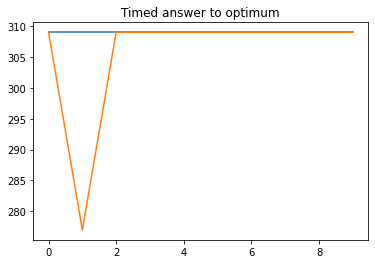

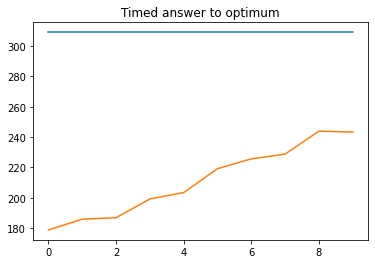

Answer = 51
Condition = 26

--------------------------------------
Max Suitability = 51
--------------------------------------

Weight = 9 | Cost = 16 | State = 0
Weight = 7 | Cost = 13 | State = 1
Weight = 8 | Cost = 15 | State = 1
Weight = 12 | Cost = 24 | State = 0
Weight = 11 | Cost = 23 | State = 1


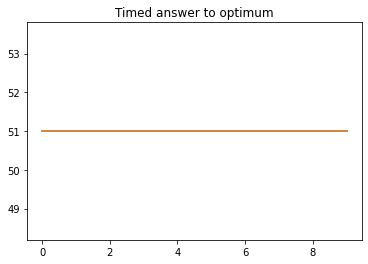

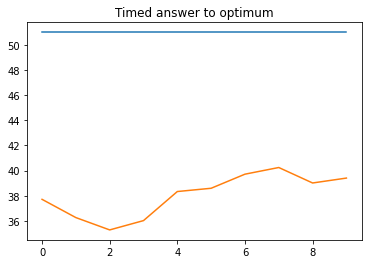

Answer = 150
Condition = 190

--------------------------------------
Max Suitability = 150
--------------------------------------

Weight = 17 | Cost = 5 | State = 0
Weight = 75 | Cost = 50 | State = 1
Weight = 64 | Cost = 46 | State = 0
Weight = 80 | Cost = 64 | State = 0
Weight = 59 | Cost = 50 | State = 1
Weight = 56 | Cost = 50 | State = 1


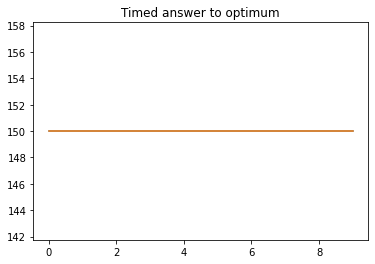

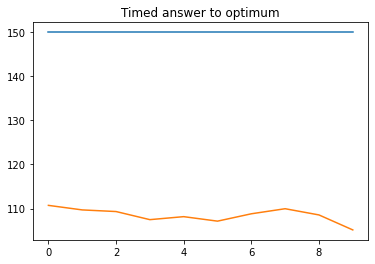

Answer = 107
Condition = 50

--------------------------------------
Max Suitability = 107
--------------------------------------

Weight = 3 | Cost = 5 | State = 0
Weight = 6 | Cost = 10 | State = 0
Weight = 4 | Cost = 7 | State = 0
Weight = 19 | Cost = 37 | State = 1
Weight = 20 | Cost = 39 | State = 0
Weight = 10 | Cost = 20 | State = 0
Weight = 31 | Cost = 70 | State = 1


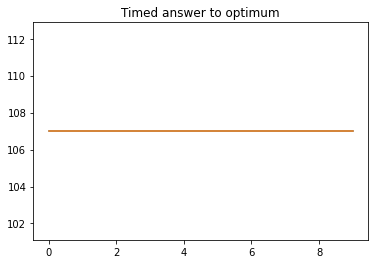

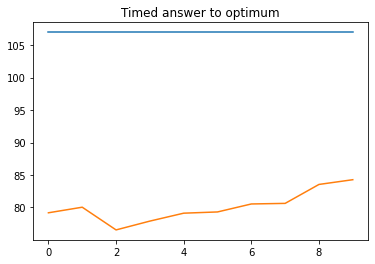

Answer = 900
Condition = 104

--------------------------------------
Max Suitability = 900
--------------------------------------

Weight = 2 | Cost = 5 | State = 1
Weight = 2 | Cost = 5 | State = 1
Weight = 3 | Cost = 8 | State = 0
Weight = 25 | Cost = 70 | State = 1
Weight = 5 | Cost = 20 | State = 1
Weight = 45 | Cost = 450 | State = 1
Weight = 35 | Cost = 400 | State = 0
Weight = 25 | Cost = 350 | State = 1


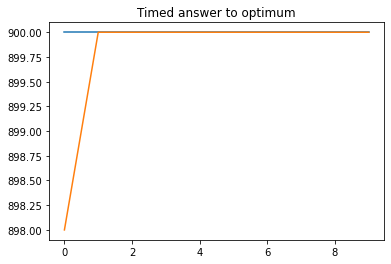

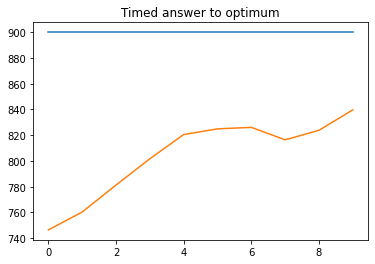

Answer = 1735
Condition = 170

--------------------------------------
Max Suitability = 1735
--------------------------------------

Weight = 57 | Cost = 564 | State = 0
Weight = 55 | Cost = 546 | State = 0
Weight = 59 | Cost = 593 | State = 1
Weight = 60 | Cost = 617 | State = 1
Weight = 49 | Cost = 511 | State = 0
Weight = 50 | Cost = 525 | State = 1
Weight = 41 | Cost = 442 | State = 0


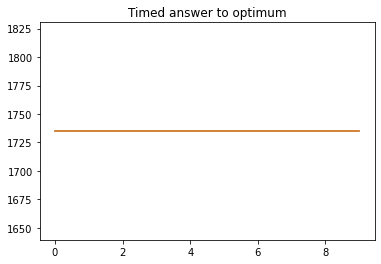

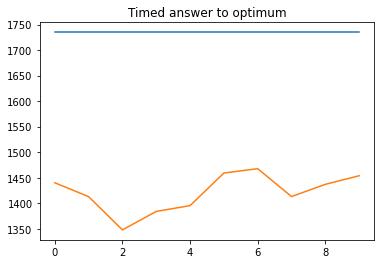

Answer = 1458
Condition = 750

--------------------------------------
Max Suitability = 1458
--------------------------------------

Weight = 87 | Cost = 163 | State = 0
Weight = 80 | Cost = 150 | State = 0
Weight = 113 | Cost = 214 | State = 0
Weight = 106 | Cost = 201 | State = 0
Weight = 82 | Cost = 156 | State = 1
Weight = 73 | Cost = 139 | State = 0
Weight = 110 | Cost = 210 | State = 0
Weight = 115 | Cost = 221 | State = 0
Weight = 90 | Cost = 173 | State = 1
Weight = 70 | Cost = 135 | State = 1
Weight = 77 | Cost = 149 | State = 1
Weight = 118 | Cost = 229 | State = 1
Weight = 94 | Cost = 184 | State = 1
Weight = 98 | Cost = 192 | State = 1
Weight = 120 | Cost = 240 | State = 1


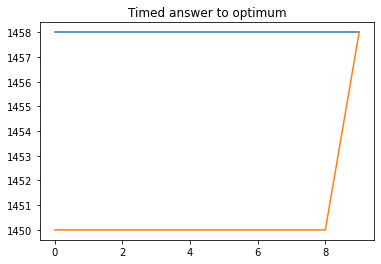

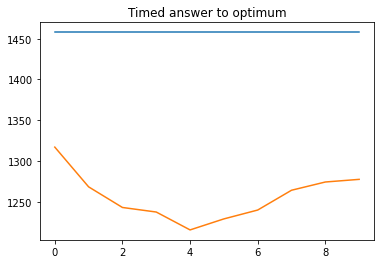

In [ ]:
import random as rn
import time

backpacks = getBackpacks()
entity_num = 100
Tm = 10
condition_array_x = []
condition_array_y = []
time_array_x = []
time_array_y = []

i = 1
for backpack in backpacks:
      start = time.time()
      data = sorted(backpack.items[:], key=lambda x: x.getCoefficient())
      print("Answer = " + str(backpack.answer))
      print("Condition = " + str(backpack.condition))
      population = generateFirstGeneration(data, entity_num, backpack.condition)
      statistic = []
      statistic_average = []
      for generationNumber in range(Tm):
          population = generationChange(population, statistic)
          statistic.append(population.getMaxSuitability()[0])
          statistic_average.append(population.getAverageSuitability())
      time_array_y.append(time.time() - start)
      print("\n--------------------------------------\n" + population.getResult() + "\n--------------------------------------\n")
      optimum = backpack.answer
      answer, entity = population.getMaxSuitability()
      printItems(entity.getChromosome().getGenes())
      printGraphAnswerToOpt(answer, statistic)
      printGraphAnswerToOpt(answer, statistic_average)
      time_array_x.append(i)
      condition_array_x.append(i)
      condition_array_y.append(answer/optimum)
      i += 1

neural net

In [ ]:
import numpy as np


def g(x, T_):
    return 0.5 * (1 + np.tanh(x/T_))


def getDifference(x):
    if x <= 0:
        return 0
    else:
        return x


def generationChange2(v, a, items, T_, condition_, statistic_):
    x = 0
    for i_ in range(len(v)):
        x += items[i_].getWeight() * v[i_]

    for k in range(len(v)):
        x -= items[k].getWeight() * v[k]
        x1 = x + items[k].getWeight() - condition_
        x2 = x - condition_

        vk = items[k].getCost() - a * ((x1 * getDifference(x1))-(x2 * getDifference(x2)))
        v[k] = g(vk, T_)
        x += items[k].getWeight() * v[k]

    statistic_.append(decodeAnswer_2(v.copy(), items)[0])
    return v


def decodeAnswer(vector, data):
    m_answer = 0
    m_weight = 0
    for i in range(len(vector)):
        vector[i] = int(vector[i])
        if vector[i] == 1:
            m_answer += data[i].getCost()
            m_weight += data[i].getWeight()
    return m_answer, m_weight


def decodeAnswer_2(vector, data):
    m_answer = 0
    m_weight = 0
    for i in range(len(vector)):
        if round(vector[i],2) > 0.90:
          #print(vector[i])
          m_answer += data[i].getCost()
          m_weight += data[i].getWeight()
    return m_answer, m_weight




def getSaturation(v):
    saturation = 0.0
    for vi in v:
        saturation += (vi - 0.5) ** 2
    return (4.0 / len(v)) * saturation


def getEvolutionRate(v, v_old):
    evoRate = 0.0
    for i in range(len(v)):
        evoRate += (v[i] - v_old[i]) ** 2
    return (10.0/len(v)) * evoRate



ДАННЫЕ: 
Объем рюкзака                  [165]
Веса объектов                  [23, 31, 29, 44, 53, 38, 63, 85, 89, 82]
Ценность объектов              [92, 57, 49, 68, 60, 43, 67, 84, 87, 72]
Оптимальное решение            [1, 1, 1, 1, 0, 1, 0, 0, 0, 0]
ДАННЫЕ: 
Объем рюкзака                  [26]
Веса объектов                  [12, 7, 11, 8, 9]
Ценность объектов              [24, 13, 23, 15, 16]
Оптимальное решение            [0, 1, 1, 1, 0]
ДАННЫЕ: 
Объем рюкзака                  [190]
Веса объектов                  [56, 59, 80, 64, 75, 17]
Ценность объектов              [50, 50, 64, 46, 50, 5]
Оптимальное решение            [1, 1, 0, 0, 1, 0]
ДАННЫЕ: 
Объем рюкзака                  [50]
Веса объектов                  [31, 10, 20, 19, 4, 3, 6]
Ценность объектов              [70, 20, 39, 37, 7, 5, 10]
Оптимальное решение            [1, 0, 0, 1, 0, 0, 0]
ДАННЫЕ: 
Объем рюкзака                  [104]
Веса объектов                  [25, 35, 45, 5, 25, 3, 2, 2]
Ценность объектов            

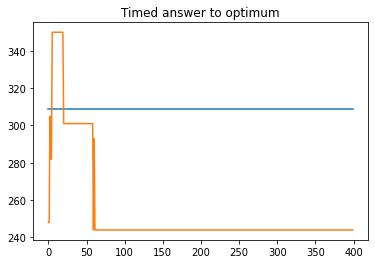

Answer = 51
Condition = 26

--------------------------------------
Answer = 47
Weight = 23
--------------------------------------



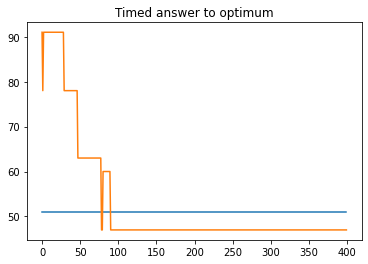

Answer = 150
Condition = 190

--------------------------------------
Answer = 119
Weight = 156
--------------------------------------



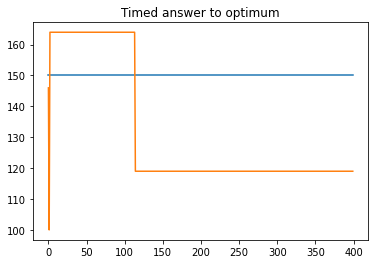

Answer = 107
Condition = 50

--------------------------------------
Answer = 107
Weight = 50
--------------------------------------



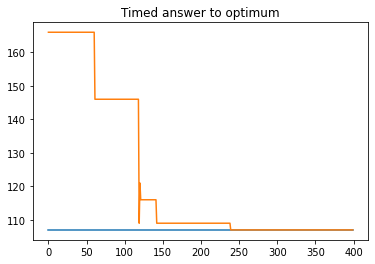

Answer = 900
Condition = 104

--------------------------------------
Answer = 888
Weight = 92
--------------------------------------



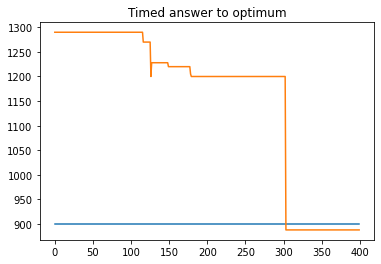

Answer = 1735
Condition = 170

--------------------------------------
Answer = 1721
Weight = 168
--------------------------------------



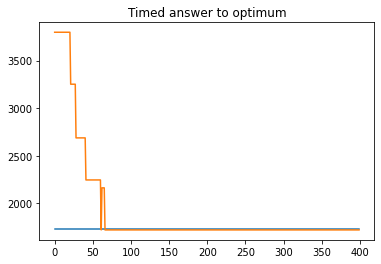

Answer = 1458
Condition = 750

--------------------------------------
Answer = 1429
Weight = 748
--------------------------------------



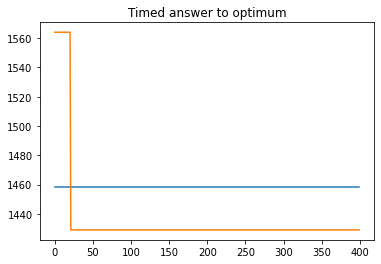

[0.0501704216003418, 0.027375221252441406, 0.03217363357543945, 0.037012577056884766, 0.04343295097351074, 0.04270482063293457, 0.08007502555847168]
[0.7896440129449838, 0.9215686274509803, 0.7933333333333333, 1.0, 0.9866666666666667, 0.9919308357348703, 0.9801097393689986]


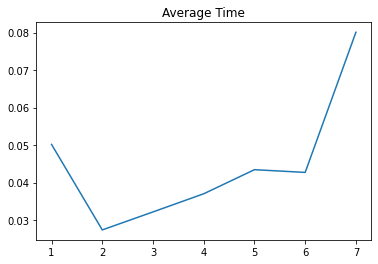

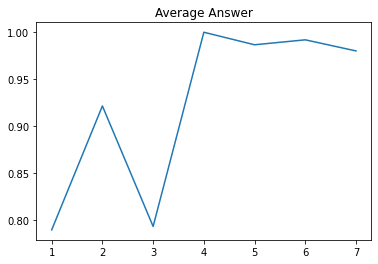

In [ ]:
import time
import random as rn


T_start = 10
T_param = 0.95
T_step = 3
T_par = 2.0
a_param = 0.1
maxCycleNumber = 400
condition_array_x = []
condition_array_y = []
time_array_x = []
time_array_y = []
averageCycleNumber = []

backpacks = getBackpacks()
entity_num = 100
Tm = 10
condition_array_x = []
condition_array_y = []
time_array_x = []
time_array_y = []
i = 1

for backpack in backpacks:
  data = backpack.items
  answer = backpack.answer
  condition = backpack.condition
  N = len(data)
  high_board = (len(data) - 1) / len(data)
  start = time.time()
  print("Answer = " + str(answer))
  print("Condition = " + str(condition))
  vector = [0.5 for _ in range(N)]
  T = T_start
  statistic = []
  for cycleNumber in range(maxCycleNumber):
    old_vector = vector.copy()
    vector = generationChange2(vector, a_param / T, data, T, condition, statistic)
    saturation = getSaturation(vector)
    #print(vector)
    #if saturation > 0.999 and getEvolutionRate(vector, old_vector) < 0.00001:
        #if decodeAnswer_2(vector, data)[1] > condition:
            #a_param *= 1.5
            #cycleNumber = 0
            #vector = [0.5 for _ in range(i)]
            #T = T_start
            #if 0.1 < saturation < high_board:
                #T *= 0.985
            #else:
             #   T *= T_param
            #continue
        #   sum_cycleNumber += cycleNumber
        #break
    #if cycleNumber % T_step == 0:
     #   T /= T_par
    if 0.1 < saturation < high_board:
        T *= 0.985
    else:
        T *= T_param

  time_array_y.append(time.time() - start)
  print("\n--------------------------------------\nAnswer = " + str(decodeAnswer_2(vector, data)[0]) + "\nWeight = "
      + str(decodeAnswer_2(vector, data)[1]) + "\n--------------------------------------\n")
  optimum = answer
  answer_ = decodeAnswer_2(vector, data)[0]
  printGraphAnswerToOpt(optimum, statistic)
  time_array_x.append(i)
  condition_array_x.append(i)
  condition_array_y.append(answer_/optimum)
  i += 1

print(time_array_y)
print(condition_array_y)
printTimeGraph(time_array_x, time_array_y)
printAverageAnswerClear(condition_array_x, condition_array_y)


## travelling salesman problem

In [ ]:
!unzip '/content/drive/MyDrive/saleman_data.zip'

Archive:  /content/drive/MyDrive/saleman_data.zip
   creating: saleman_data/
  inflating: saleman_data/a280.tsp   
  inflating: saleman_data/att48.tsp  
  inflating: saleman_data/bays29.tsp  
  inflating: saleman_data/ch150.tsp  
  inflating: saleman_data/fl417.tsp  
  inflating: saleman_data/gr17.txt   


In [ ]:
!unzip '/content/drive/MyDrive/saleman_answer.zip'

Archive:  /content/drive/MyDrive/saleman_answer.zip
  inflating: att48.txt               
  inflating: bys29.txt               
  inflating: ch150.txt               
  inflating: a280.txt                


In [ ]:
import tsplib95

In [ ]:
import numpy as np
def get_data_for_test_saleman(path_folder):
  data = tsplib95.load(path_folder)
  if data.edge_weight_format is None:
    intercity_distance_table =np.zeros( [ data.dimension , data.dimension])
    for i  in range(data.dimension ):
      for j in range( data.dimension ):
        edge = i+1 , j+1
        intercity_distance_table[i][j] =  data.get_weight(*edge)
  elif data.edge_weight_format == 'LOWER_DIAG_ROW':
    print("WTF! Get this shit off me!")
    return 0
  elif data.edge_weight_format == 'FULL_MATRIX':
    intercity_distance_table =np.zeros( [ data.dimension , data.dimension ])
    for i in range(data.dimension):
      for j in range(data.dimension):
        intercity_distance_table[i][j] =  data.edge_weights[i][j]

  return intercity_distance_table

In [ ]:
def get_answer_path(path_folder):
  with open(path_folder, 'r') as f:
    nums = f.read().splitlines()
    nums.pop()
    for i in range(len(nums)):
      nums[i] = int(nums[i])-1
  return nums

In [ ]:
def encode_path(path):
  path_ = ""
  for i in range(len(path)):
    path_ += chr(path[i])
  return path_

In [ ]:
class Graph:
    def __init__(self, graph_ = {}):
        self.graph = graph_
        self.answer = 0

    def setNode(self, nodes):
        if nodes not in self.graph.keys():
            self.graph[nodes] = {}
        return self

    def setNeighbour(self, nodes, neighbour, weight=0):
        if nodes not in self.graph.keys():
            self.graph[nodes] = {}
        if neighbour not in self.graph.keys():
            self.graph[neighbour] = {}

        self.graph[nodes][neighbour] = weight
        self.graph[neighbour][nodes] = weight
        return self

    def getVertices(self):
        return list(self.graph.keys())

    def getNeighbours(self, vertex):
        if vertex in self.graph.keys():
            return self.graph[vertex]

    def getPathCost(self, path):
        pathCost = 0
        for node, neighbour in zip(path, path[1:]):
              pathCost += self.graphus[node][neighbour]
        pathCost +=  self.graph[path[-1]][path[0]]
        return pathCost

    def setAnswer(self, answer_path):
        self.answer = self.getPathCost(answer_path)

    def graphClean(self):
      self.graph = None
      self.answer = 0
      return self

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx
def printPath(graph, path):
  newGraph= nx.Graph()
  newGraph.add_nodes_from([i for i in range(len(path))])
  newGraph.add_edges_from((ord(node), ord(neighbour)) for node, neighbour in zip(path, path[1:]))
  newGraph.add_edge(ord(path[-1]), ord(path[0]))
  plt.figure(figsize =(10, 10))
  nx.draw(newGraph, with_labels=True, font_weight='bold')
  plt.show()


In [ ]:
def getGraph_(file, answer='', last=False):
  if last:
    arr = []
    with open('saleman_data/gr17.txt') as f:
      arr = [list(map(int, row.split())) for row in f.readlines()]
    setus = {}
    graph_ = Graph(setus)
    graph_.answer=400000

    for i in range(0, len(arr)):
      for j in range(i, len(arr)):
        graph_ = graph_.setAdjacent(chr(i), chr(j), int(arr[i][j]))
    return graph_

  arr = get_data_for_test_saleman(file)
  setus = {}
  graph_ = Graph(setus)
  if answer != '':
    answer_path = get_answer_path(answer)

  for i in range(0, len(arr)):
    for j in range(i, len(arr)):
      graph_ = graph_.setAdjacent(chr(i), chr(j), int(arr[i][j]))

  if answer != '':
    graph_.setAnswer(encode_path(answer_path))
  else:
    graph_.answer=400000
  return graph_



In [ ]:
import numpy as np
import operator
import math

class GeneticAlgorithm:
    def __init__(self, generations_, population_size_, tournamentSize_, mutationRt_, elitRt_):
        self.generations = generations_
        self.population_size = population_size_
        self.tournamentSize = tournamentSize_
        self.mutationRate = mutationRt_
        self.elitRt = elitRt_

    def __makePopulation(self, graph_nodes):
        return [''.join(v for v in np.random.permutation(graph_nodes)) for i in range(self.population_size)]

    def __computeFitness(self, graph, population):
        return [graph.getPathCost(path) for path in population]

    def __tournamentSelection(self, graph, population):
        tournament_contestants = np.random.choice(population, size=self.tournamentSize)
        tournament_contestants_fitness = self.__computeFitness(graph, tournament_contestants)
        return tournament_contestants[np.argmin(tournament_contestants_fitness)]

    def __crossover(self, parent1, parent2):
        offspring = ['' for allele in range(len(parent1))]
        index_low, index_high = self.__computeLowHighIndexes(parent1)
        offspring[index_low:index_high+1] = list(parent1)[index_low:index_high+1]
        offspring_available_index = list(range(0, index_low)) + list(range(index_high+1, len(parent1)))
        for allele in parent2:
            if '' not in offspring:
                break
            if allele not in offspring:
                offspring[offspring_available_index.pop(0)] = allele
        return ''.join(v for v in offspring)

    def __mutate(self, genome):
        if np.random.random() < self.mutationRt:
            index_low, index_high = self.__computeLowHighIndexes(genome)
            return self.__swap(index_low, index_high, genome)
        else:
            return genome

    def __computeLowHighIndexes(self, string):
        index_low = np.random.randint(0, len(string)-1)
        index_high = np.random.randint(index_low+1, len(string))
        while index_high - index_low > math.ceil(len(string)//2):
            try:
                index_low = np.random.randint(0, len(string))
                index_high = np.random.randint(index_low+1, len(string))
            except ValueError:
                pass
        return (index_low, index_high)

    def __swap(self, index_low, index_high, string):
        string = list(string)
        string[index_low], string[index_high] = string[index_high], string[index_low]
        return ''.join(string)

    def getOptimalPath(self, graph):
        population = self.__makePopulation(graph.getVertices())
        elitOffset = math.ceil(self.population_size*self.elitRt)
        for generation in range(self.generations):
            newPopulation = []
            fitness = self.__computeFitness(graph, population)
            fittest = np.argmin(fitness)
            if elitOffset:
                elites = np.array(fitness).argsort()[:elitOffset]
                [newPopulation.append(population[i]) for i in elites]
            for gen in range(elitOffset, self.population_size):
                parent1 = self.__tournamentSelection(graph, population)
                parent2 = self.__tournamentSelection(graph, population)
                offspring = self.__crossover(parent1, parent2)
                newPopulation.append(offspring)
            for gen in range(elitOffset, self.population_size):
                newPopulation[gen] = self.__mutate(newPopulation[gen])
            population = newPopulation
        return (population[fittest], fitness[fittest])

In [ ]:
def decode_(op):
  path = ""
  for ch in op:
    path += str(ord(ch)) + " "
  return path

In [ ]:
import random as rn
import time

files = ['saleman_data/a280.tsp', 'saleman_data/att48.tsp', 'saleman_data/bays29.tsp', 'saleman_data/ch150.tsp', 'saleman_data/fl417.tsp']
answers = ['a280.txt', 'att48.txt', 'bys29.txt', 'ch150.txt', '', '']

graphs = []
for i in range(len(files)):
  graphs.append(getGraph_(files[i], answers[i]))
graphs.append(getGraph_('aaa', 'bbb', True))

generations_ = [10000, 1500, 250, 10000, 150, 100]
populations = [15, 10, 10, 15, 10, 10]
times = []
kf = []
i = 0
for ind in range(len(graphs)):
  start = time.time()
  ga = GeneticAlgorithm(generations=generations_[i], population_size=populations[i], tournamentSize=4, mutationRate=0.5, elitismRate=0.2)
  times.append(time.time()-start)
  optimal_path, path_cost = ga.getOptimalPath(graphs[ind])
  kf.append(path_cost / graphs[ind].answer)
  print ('\n' +'Path: ' + str(decode_(optimal_path)) + '\n' + 'Cost: ' + str(path_cost) +'\n' + 'Answer: ' + str(graphs[ind].answer))
  #printPath(graphs[ind], optimal_path)
  i+=1
print(times)
print(kf)


Path: 187 77 76 68 40 19 270 271 273 259 253 252 217 223 222 224 210 11 15 269 136 137 140 139 147 146 228 244 243 278 261 125 36 34 52 75 78 96 95 94 91 99 169 102 107 109 110 120 153 130 17 275 276 3 279 1 238 245 237 230 209 203 143 199 144 175 59 60 117 61 62 85 83 103 164 184 186 180 182 138 8 10 258 257 256 208 213 226 232 233 214 218 219 190 161 162 106 113 114 123 25 21 24 12 22 132 145 198 195 201 205 277 4 5 142 197 194 191 193 200 202 211 242 240 239 254 263 152 32 33 31 27 26 18 131 129 20 128 30 41 42 57 58 168 167 165 170 171 172 173 159 158 176 177 150 157 111 81 80 88 108 178 141 204 231 236 235 234 221 220 196 192 185 163 166 101 79 72 70 69 66 67 63 64 84 71 73 74 93 92 97 98 100 90 89 82 65 43 54 53 47 51 46 45 55 56 44 39 38 37 49 50 48 35 29 268 262 248 247 133 127 28 126 134 267 135 155 151 118 156 116 115 112 86 87 104 105 174 160 181 225 227 229 250 249 246 241 2 6 7 9 13 23 16 14 272 274 260 206 212 215 216 149 119 121 122 124 154 266 255 251 207 264 265 148 1